In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
data = pd.read_csv('rotten_tomatoes_movies.csv')
tag = pd.read_csv('tag.csv')

In [3]:
#data["movie_status"]=tag['0']

In [4]:
data.isnull().sum()

rotten_tomatoes_link                0
movie_title                         0
movie_info                         24
critics_consensus                8329
poster_image_url                    0
rating                              0
genre                              17
directors                         114
writers                          1349
cast                              284
in_theaters_date                  815
on_streaming_date                   2
runtime_in_minutes                155
studio_name                       416
tomatometer_status                  0
tomatometer_rating                  0
tomatometer_count                   0
audience_status                   252
audience_rating                   252
audience_count                    252
audience_top_critics_count          0
audience_fresh_critics_count        0
audience_rotten_critics_count       0
dtype: int64

In [5]:
data['rating'].value_counts()

R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: rating, dtype: int64

In [6]:

data=data.replace({'rating': {'PG-13)': 'PG-13', 'R)': 'R'}})


In [7]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['tomatometer_status'] = label_encoder.fit_transform(data['tomatometer_status'])

In [9]:
data.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,2,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,0,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,1,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,0,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,1,89,27,Upright,74.0,68860.0,5,24,3


In [10]:
data.corr()

,runtime_in_minutes,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
runtime_in_minutes,1.000000,-0.105393,0.071270,0.191975,0.168507,0.048799,0.164626,0.190409,0.101849
tomatometer_status,-0.105393,1.000000,-0.806840,-0.275054,-0.582228,-0.042049,-0.262116,-0.534741,0.296627
tomatometer_rating,0.071270,-0.806840,1.000000,0.079565,0.660111,0.014426,0.049651,0.344220,-0.406547
tomatometer_count,0.191975,-0.275054,0.079565,1.000000,0.141012,0.132686,0.928250,0.902671,0.684753
audience_rating,0.168507,-0.582228,0.660111,0.141012,1.000000,0.022812,0.127383,0.312270,-0.217062
audience_count,0.048799,-0.042049,0.014426,0.132686,0.022812,1.000000,0.129592,0.125137,0.081453
audience_top_critics_count,0.164626,-0.262116,0.049651,0.928250,0.127383,0.129592,1.000000,0.805213,0.691071
audience_fresh_critics_count,0.190409,-0.534741,0.344220,0.902671,0.312270,0.125137,0.805213,1.000000,0.304512
audience_rotten_critics_count,0.101849,0.296627,-0.406547,0.684753,-0.217062,0.081453,0.691071,0.304512,1.000000


In [11]:
data['audience_status'].value_counts()

Upright    8953
Spilled    7433
Name: audience_status, dtype: int64

In [12]:
x={'Upright':1,'Spilled':2}
data['audience_status']=data['audience_status'].str.strip().map(x)


In [13]:
data['audience_status'].nunique()

2

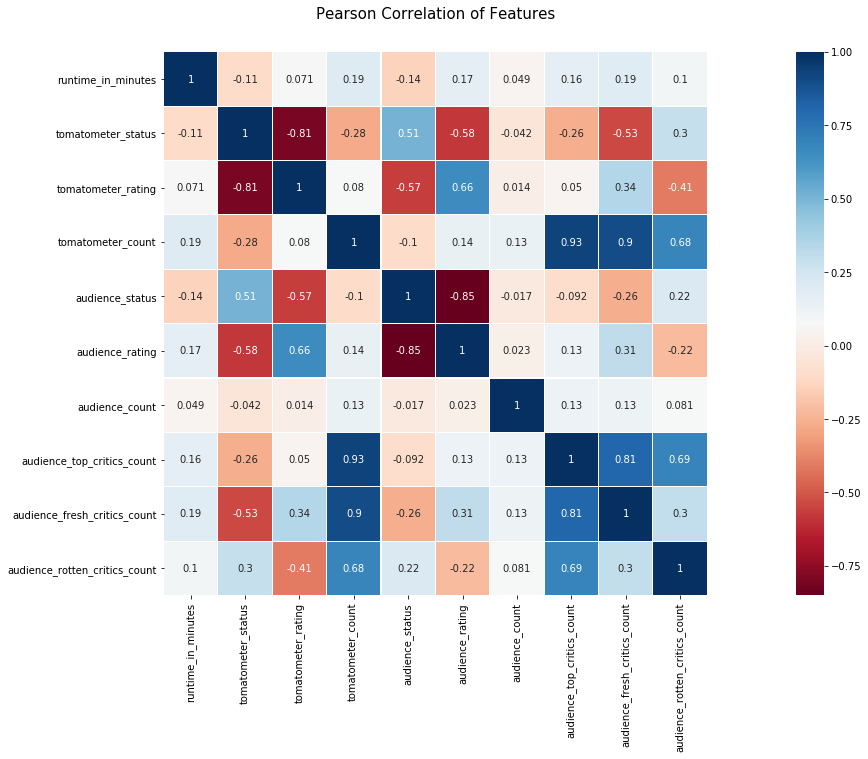

In [14]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns_plot=sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
sns_plot.figure.savefig("output.png")

In [15]:
data= data.drop(['movie_info','critics_consensus','poster_image_url','writers','on_streaming_date','in_theaters_date','studio_name','tomatometer_status','audience_status','audience_top_critics_count','audience_fresh_critics_count','audience_rotten_critics_count'],axis=1)

In [16]:
data.head()

,rotten_tomatoes_link,movie_title,rating,genre,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0
1,/m/0878835,Please Give,R,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0
2,/m/10,10,R,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0


In [17]:
data['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

In [18]:
data = pd.get_dummies(data, prefix_sep= "__", 
                         columns = ['rating'])

In [19]:
data.head(5)

,rotten_tomatoes_link,movie_title,genre,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,rating__PG,rating__PG-13,rating__R
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,0,0,1,0,0
1,/m/0878835,Please Give,Comedy,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,0,0,0,0,1
2,/m/10,10,"Comedy, Romance",Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,0,0,0,0,1
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"Classics, Drama",Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,0,1,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","Action & Adventure, Drama, Kids & Family",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,0,0,0,0,0


In [20]:
tag.head()

,Unnamed: 0,0
0,/m/0814255,20
1,/m/0878835,122
2,/m/10,18
3,/m/1000013-12_angry_men,47
4,/m/1000079-20000_leagues_under_the_sea,20


In [21]:
#data= data[data['genre'] != ''].reset_index(drop = True) 

In [22]:
data.isnull().sum()

rotten_tomatoes_link      0
movie_title               0
genre                    17
directors               114
cast                    284
runtime_in_minutes      155
tomatometer_rating        0
tomatometer_count         0
audience_rating         252
audience_count          252
rating__G                 0
rating__NC17              0
rating__NR                0
rating__PG                0
rating__PG-13             0
rating__R                 0
dtype: int64

In [23]:
data = data.dropna(axis=0, subset=['genre'])

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
import json

## format genre column to be in the form of a list rather than string

genre_new=[] #declare a list
for cell in data['genre']:
    cell=cell.replace(" ","") #remove whitespace
    cell=cell.replace("&", "& ") #add whitespace back in for ampersands
    genre_new.append(cell.split(",")) #for each genre cell, create a list of items from the original string, using a comma as a delimeter
    
#add new genre column to the dataframe
data['genre_new'] = genre_new 

## MultiLabelBinarizer takes an iterable list and turns it into columns with binary values that represent the list.
## For example, [Comedy, Drama] -> Comedy and Drama columns with a value of 1, all other columns with a value of 0

#initialize MultiLabelBinarizer 
mlb = MultiLabelBinarizer() 

#transform the genre_new column to a series of columns with binary values
binary_labels=pd.DataFrame(mlb.fit_transform(data['genre_new']),columns=mlb.classes_) 

#order columns alphabetically
binary_labels=binary_labels.sort_index(axis=1) 

binary_labels.head()

,Action& Adventure,Animation,Anime& Manga,ArtHouse& International,Classics,Comedy,CultMovies,Documentary,Drama,Faith& Spirituality,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
data = data.merge(binary_labels, how='inner', left_index=True, right_index=True)
data= data.drop(columns=['genre','genre_new'])
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",83.0,49,144,53.0,254287.0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",118.0,68,22,53.0,14670.0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",Richard Fleischer,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",127.0,89,27,74.0,68860.0,1,...,0,1,0,0,0,0,0,0,0,0


In [26]:
data['cast'] = data['cast'].apply(lambda x:str(x).split(","))
data['cast'] = data['cast'].apply(lambda x:','.join(x))
data['directors'] = data['directors'].apply(lambda x:str(x).split(","))
data['directors'] = data['directors'].apply(lambda x:','.join(x))

In [27]:
data['cast']

0        Logan Lerman, Brandon T. Jackson, Alexandra Da...
1        Catherine Keener, Amanda Peet, Oliver Platt, R...
2        Dudley Moore, Bo Derek, Julie Andrews, Robert ...
3        Martin Balsam, John Fiedler, Lee J. Cobb, E.G....
4        James Mason, Kirk Douglas, Paul Lukas, Peter L...
                               ...                        
16616    Taylor Handley, Alison Folland, Dustin Seavey,...
16617    Steve Guttenberg, Kathleen Quinlan, Arnold Vos...
16618    Fred Astaire, Judy Garland, Gene Kelly, Willia...
16619    David Bowie, Mick Ronson, Trevor Bolder, Mick ...
16620    Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...
Name: cast, Length: 16604, dtype: object

In [28]:
# data1 = pd.read_csv('movie_metadata.csv')
# t = data1[['actor_2_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_facebook_likes','actor_3_name']]


In [29]:

# actor1_data = data1[['actor_1_name','actor_1_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor2_data = data1[['actor_2_name','actor_2_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor3_data = data1[['actor_3_name','actor_3_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# # director_data = data1[['director_name','director_facebook_likes']].drop_duplicates(keep= 'first').reset_index(drop=True)
# actor1_data.columns,actor2_data.columns,actor3_data.columns = ['actor','likes'],['actor','likes'],['actor','likes']

In [30]:
# f_data = pd.concat([actor2_data,actor2_data,actor3_data]).drop_duplicates(keep= 'first').reset_index(drop=True)

In [31]:
# f_data['actor'] = f_data['actor'].apply(lambda x:str(x).replace(" ", "").lower())

In [32]:
# d = f_data.set_index('actor')['likes'].to_dict()

In [33]:
# li = list()
# i=0
# total = 0
# for x in data['cast']:
#     total=0
#     for y in x:
#         s = str(y).replace(" ", "").lower()
#         if(s in d.keys()):
#             total+=d[s] 
#     li.append(total)
# #     data['cast'][i]=total
#     i=i+1
# data['cast'] = li

In [34]:
data['directors'] = data['directors'].apply(lambda x:str(x).replace(" ", "").lower())
data['cast'] = data['cast'].apply(lambda x:str(x).replace(" ", "").lower())

In [35]:
li = ','.join(data['directors']).split(',')
li=set(li)
director_dict = {i:0 for i in li}

In [36]:
li = ','.join(data['cast']).split(',')
li=set(li)
cast_dict = {i:0 for i in li}

In [37]:
 for x in data['directors']:
    lis=x.split(',')
    for y in lis:
        if y in director_dict:
            val = director_dict.get(y) + 1
            director_dict[y]=val

            
dir_li=list()
i=0
total = 0
for x in data['directors']:
    total=0
    directs=x.split(',')
    for y in directs:       
        if y in director_dict:
            total+=director_dict[y]*10
    dir_li.append(total)
#     data['directors'][i]=total
    i=i+1
data['directors'] = dir_li

In [38]:
 for x in data['cast']:
    lis=x.split(',')
    for y in lis:
        if y in cast_dict:
            val = cast_dict.get(y) + 1
            cast_dict[y]=val

            
dir_li=list()
i=0
total = 0
for x in data['cast']:
    total=0
    directs=x.split(',')
    for y in directs:       
        if y in cast_dict:
            total+=cast_dict[y]*10
    dir_li.append(total)
#     data['directors'][i]=total
    i=i+1
data['cast'] = dir_li

In [39]:
len(data[data['directors']==0])

0

In [40]:
len(data[data['cast']==0])

0

In [41]:
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,130,7150,83.0,49,144,53.0,254287.0,0,...,0,0,0,0,0,1,0,0,0,0
1,/m/0878835,Please Give,50,2600,90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,0
2,/m/10,10,270,3180,118.0,68,22,53.0,14670.0,0,...,0,0,0,0,1,0,0,0,0,0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),300,2080,95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",170,2410,127.0,89,27,74.0,68860.0,1,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# data['cast']=pd.to_numeric(data['cast'])
# data['directors']=pd.to_numeric(data['directors'])
data.tail(100)

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
16521,/m/year_one,Year One,110,6610,97.0,14,173,23.0,336898.0,0,...,0,0,0,0,0,0,0,0,0,0
16522,/m/yeh_jawaani_hai_deewani_2013,Yeh Jawaani Hai Deewani,10,200,125.0,67,6,63.0,2944.0,0,...,0,0,0,0,0,0,0,0,0,0
16523,/m/yella,Yella,50,520,89.0,81,53,53.0,972.0,0,...,0,0,0,0,0,0,0,0,0,0
16524,/m/yelling_to_the_sky,Yelling to the Sky,10,1800,95.0,36,11,46.0,409.0,0,...,0,0,0,0,0,0,0,0,0,0
16525,/m/yellowbeard,Yellowbeard,20,4130,97.0,22,9,64.0,6929.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16616,/m/zerophilia,Zerophilia,10,500,90.0,25,20,61.0,1628.0,0,...,0,0,1,0,0,0,0,0,0,0
16617,/m/zeus_and_roxanne,Zeus and Roxanne,1120,1000,98.0,44,9,42.0,8967.0,0,...,0,0,0,0,0,0,0,0,0,0
16618,/m/ziegfeld_follies,Ziegfeld Follies,550,5000,109.0,67,9,59.0,2874.0,0,...,0,0,0,0,0,0,0,0,0,0
16619,/m/ziggy_stardust_and_the_spiders_from_mars_1973,Ziggy Stardust and the Spiders from Mars,60,290,91.0,73,40,88.0,1906.0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data.iloc[1927]

rotten_tomatoes_link       /m/40_days_and_40_nights
movie_title                   40 Days and 40 Nights
directors                                        70
cast                                           3130
runtime_in_minutes                               95
tomatometer_rating                               38
tomatometer_count                               136
audience_rating                                  43
audience_count                               460837
rating__G                                         0
rating__NC17                                      0
rating__NR                                        0
rating__PG                                        0
rating__PG-13                                     0
rating__R                                         1
Action& Adventure                                 0
Animation                                         0
Anime& Manga                                      0
ArtHouse& International                           0
Classics    

In [44]:
data.isnull().sum()

rotten_tomatoes_link         0
movie_title                  0
directors                    0
cast                         0
runtime_in_minutes         155
tomatometer_rating           0
tomatometer_count            0
audience_rating            252
audience_count             252
rating__G                    0
rating__NC17                 0
rating__NR                   0
rating__PG                   0
rating__PG-13                0
rating__R                    0
Action& Adventure            0
Animation                    0
Anime& Manga                 0
ArtHouse& International      0
Classics                     0
Comedy                       0
CultMovies                   0
Documentary                  0
Drama                        0
Faith& Spirituality          0
Gay& Lesbian                 0
Horror                       0
Kids& Family                 0
Musical& PerformingArts      0
Mystery& Suspense            0
Romance                      0
ScienceFiction& Fantasy      0
SpecialI

In [45]:
data.corr()

,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,...,Horror,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western
directors,1.000000,0.177304,0.099006,0.083523,0.074138,0.080552,0.033998,0.030660,-0.001020,-0.058060,...,-0.008347,-0.001017,0.015549,0.006162,0.008974,-0.009700,-0.012703,0.004110,0.015150,-0.005970
cast,0.177304,1.000000,0.222311,-0.142755,0.365830,-0.020722,0.113293,-0.009031,-0.018603,-0.376424,...,-0.012587,0.001319,-0.005686,0.009117,0.008146,0.002703,-0.022347,-0.002811,-0.002778,0.001683
runtime_in_minutes,0.099006,0.222311,1.000000,0.071590,0.191851,0.168294,0.048793,-0.027534,0.008576,-0.105755,...,-0.022121,-0.016287,0.003260,-0.000981,0.020085,-0.004394,-0.014611,0.007098,-0.002788,0.002732
tomatometer_rating,0.083523,-0.142755,0.071590,1.000000,0.079822,0.660195,0.014433,0.065044,0.013278,0.275470,...,-0.013772,0.001111,0.017904,-0.023261,0.008291,-0.007649,0.006536,0.012777,0.011899,-0.000504
tomatometer_count,0.074138,0.365830,0.191851,0.079822,1.000000,0.141117,0.132706,-0.059459,-0.003597,-0.327942,...,0.005195,-0.002659,0.014204,-0.017647,-0.002128,0.007568,0.000786,0.001582,-0.007099,0.005731
audience_rating,0.080552,-0.020722,0.168294,0.660195,0.141117,1.000000,0.022769,0.076804,0.017086,0.106833,...,-0.032171,0.000550,0.029420,-0.034964,0.010349,-0.017422,0.010169,0.015626,0.014421,-0.005005
audience_count,0.033998,0.113293,0.048793,0.014433,0.132706,0.022769,1.000000,-0.002816,-0.003628,-0.051745,...,0.007028,-0.003294,0.005368,-0.012077,0.009365,-0.002145,-0.002928,0.027946,-0.007314,0.001008
rating__G,0.030660,-0.009031,-0.027534,0.065044,-0.059459,0.076804,-0.002816,1.000000,-0.009554,-0.129922,...,-0.016316,0.063430,0.024682,-0.021498,0.009046,0.023967,-0.000938,-0.002647,0.009700,-0.012248
rating__NC17,-0.001020,-0.018603,0.008576,0.013278,-0.003597,0.017086,-0.003628,-0.009554,1.000000,-0.030370,...,0.007044,-0.001956,-0.000938,-0.010911,0.004002,0.004681,0.006313,-0.004877,-0.005937,-0.006223
rating__NR,-0.058060,-0.376424,-0.105755,0.275470,-0.327942,0.106833,-0.051745,-0.129922,-0.030370,1.000000,...,-0.016832,-0.018136,0.001142,-0.017954,0.006016,-0.010188,0.025047,0.004994,-0.001507,-0.003801


In [46]:
data['label']=tag['0']

In [47]:
data.head()

,rotten_tomatoes_link,movie_title,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,...,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western,label
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,130,7150,83.0,49,144,53.0,254287.0,0,...,0,0,0,0,1,0,0,0,0,20.0
1,/m/0878835,Please Give,50,2600,90.0,86,140,64.0,11567.0,0,...,0,0,0,0,0,0,0,0,0,122.0
2,/m/10,10,270,3180,118.0,68,22,53.0,14670.0,0,...,0,0,0,1,0,0,0,0,0,18.0
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),300,2080,95.0,100,51,97.0,105000.0,0,...,0,0,0,0,0,0,0,0,0,47.0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea",170,2410,127.0,89,27,74.0,68860.0,1,...,1,0,0,0,0,0,0,0,0,20.0


In [48]:
data=data.drop(columns=['rotten_tomatoes_link','movie_title'])

In [49]:
data.fillna(data.mean(),inplace = True)

In [50]:
data.isnull().sum()

directors                  0
cast                       0
runtime_in_minutes         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
audience_count             0
rating__G                  0
rating__NC17               0
rating__NR                 0
rating__PG                 0
rating__PG-13              0
rating__R                  0
Action& Adventure          0
Animation                  0
Anime& Manga               0
ArtHouse& International    0
Classics                   0
Comedy                     0
CultMovies                 0
Documentary                0
Drama                      0
Faith& Spirituality        0
Gay& Lesbian               0
Horror                     0
Kids& Family               0
Musical& PerformingArts    0
Mystery& Suspense          0
Romance                    0
ScienceFiction& Fantasy    0
SpecialInterest            0
Sports& Fitness            0
Television                 0
Western                    0
label         

# Skewness

<Figure size 1440x1440 with 0 Axes>

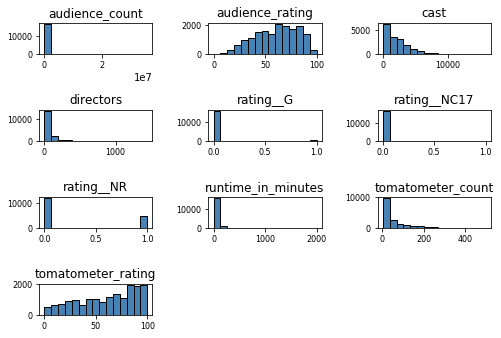

In [51]:
plt.figure(figsize=(20,20))
data.iloc[:,:10].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

runtime_in_minutes    27.756649
rating__NC17          21.114913
audience_count        17.973384
directors              6.679758
rating__G              4.744597
tomatometer_count      2.010689
cast                   1.334875
rating__NR             0.913524
tomatometer_rating     0.419065
audience_rating        0.309191
dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

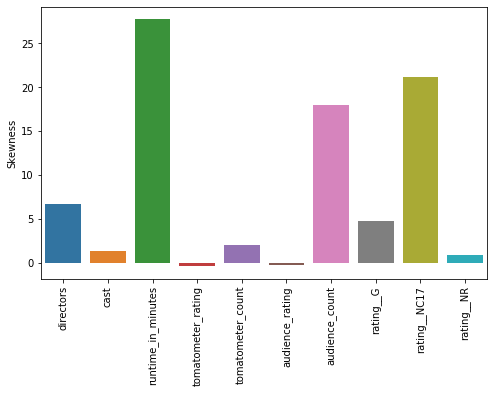

In [52]:
skew=data.iloc[:,:10].skew()
print(skew.abs().sort_values(ascending=False))
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(8,5))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

In [53]:
data_copy=data.copy()

In [54]:
def remove_skew_n_power(col):
  print("Removing Skew by applying power of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**i).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = i
  return power, min_skew

In [55]:
def remove_skew_n_root(col):
  print("Removing Skew by applying root of N :")
  power = 0
  min_skew = 99999
  for i in range(1,11):
    skew = abs((col**(1/i)).skew())
    print(i,skew)
    if(skew < min_skew) :
      min_skew = skew
      power = 1/i
  return power, min_skew

Directors

In [56]:
data["directors"].skew()

6.67975798292568

In [57]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["directors"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["directors"]))

Removing Skew by applying power of N :
1 6.67975798292568
2 11.41813952746434
3 12.1581086197349
4 12.842909118471557
5 14.25355733075244
6 17.121252872806295
7 9.130190666988765
8 1.4388987567822797
9 0.27618448984252075
10 0.6771401291565916
Minimum Skewness (N, Skewness) : (9, 0.27618448984252075)



Removing Skew by applying root of N :
1 6.67975798292568
2 2.356740433475564
3 1.4489172323884096
4 1.1058738481354484
5 0.9291561633195123
6 0.8218905267391573
7 0.7499590831222062
8 0.6983989065919766
9 0.6596383473509541
10 0.6294407268487788
Minimum Skewness (N, Skewness) : (0.1, 0.6294407268487788)


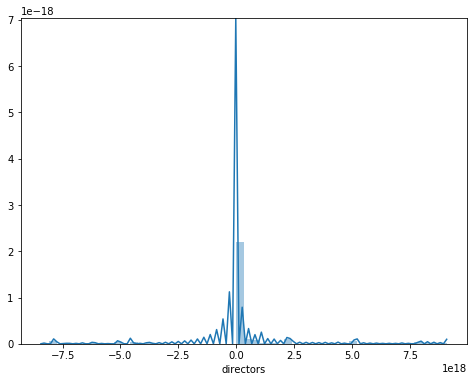

In [58]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["directors"]**9)

In [59]:
data["directors"]=data["directors"]**9

cast

In [60]:
data["cast"].skew()

1.3348753694915416

In [61]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["cast"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["cast"]))

Removing Skew by applying power of N :
1 1.3348753694915416
2 4.656917367838057
3 11.173853185562198
4 20.56244014901088
5 0.514842838648432
6 0.18494244576239627
7 0.03715251614592233
8 0.10202182055209488
9 0.00012776602130596342
10 0.0293323869143319
Minimum Skewness (N, Skewness) : (9, 0.00012776602130596342)



Removing Skew by applying root of N :
1 1.3348753694915416
2 0.24334411888606086
3 0.12845981298714887
4 0.3293505865002838
5 0.4575234118666766
6 0.5470034285283267
7 0.6132024946140723
8 0.6642320043108074
9 0.7048008682756572
10 0.7378411856190111
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.12845981298714887)


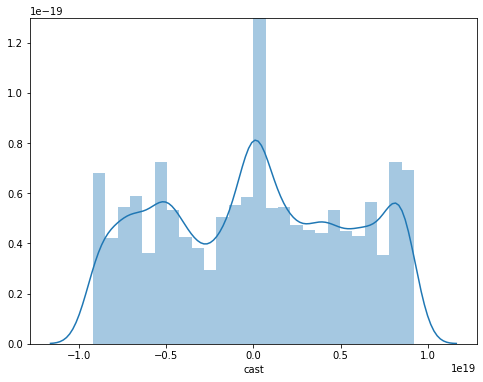

In [62]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["cast"]**9)

In [63]:
data["cast"]=data["cast"]**9

runtime_in_minutes

In [64]:
data["runtime_in_minutes"].skew()

27.75664935979491

In [65]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["runtime_in_minutes"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["runtime_in_minutes"]))

Removing Skew by applying power of N :
1 27.75664935979491
2 123.40277640145297
3 128.72824532927723
4 128.85103089721378
5 128.8562070895488
6 128.856491626474
7 128.85650828818203
8 128.85650927964866
9 128.85650933897085
10 128.85650934252945
Minimum Skewness (N, Skewness) : (1, 27.75664935979491)



Removing Skew by applying root of N :
1 27.75664935979491
2 2.684163318954417
3 0.33326843844970155
4 0.7364514366829015
5 1.4366073408081355
6 1.9498066586237994
7 2.346552646003817
8 2.663596911727888
9 2.923083394057524
10 3.1394662687378507
Minimum Skewness (N, Skewness) : (0.3333333333333333, 0.33326843844970155)


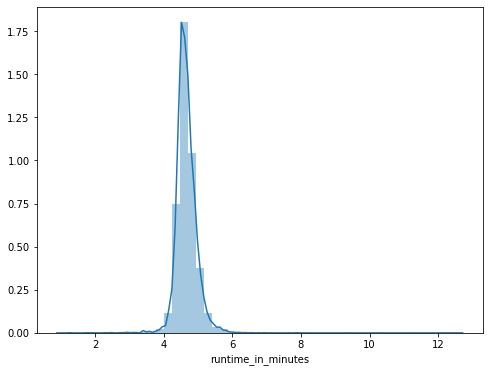

In [66]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["runtime_in_minutes"]**(1/3))

In [67]:
data["runtime_in_minutes"]=data["runtime_in_minutes"]**(1/3)

audience_count

In [68]:
data["audience_count"].skew()

17.973383530483346

In [69]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["audience_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["audience_count"]))

Removing Skew by applying power of N :
1 17.973383530483346
2 18.22962793925369
3 18.344917989299923
4 18.51305921071749
5 18.739971920213115
6 19.032220744022386
7 19.397405249196343
8 19.844159043422685
9 20.38210132596836
10 21.02173172102365
Minimum Skewness (N, Skewness) : (1, 17.973383530483346)



Removing Skew by applying root of N :
1 17.973383530483346
2 11.774875646655012
3 5.358530742938584
4 3.0000598297488663
5 2.0487888057679036
6 1.569427917394569
7 1.2854472486192707
8 1.0980106398071265
9 0.9648224870349464
10 0.8650896398955965
Minimum Skewness (N, Skewness) : (0.1, 0.8650896398955965)


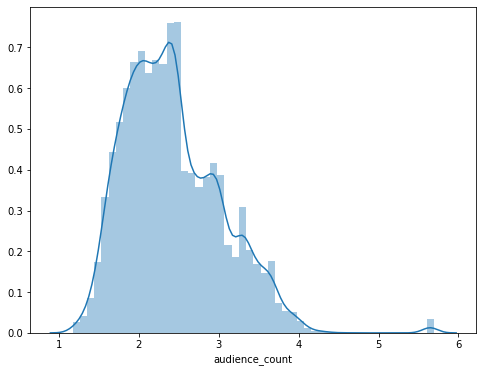

In [70]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["audience_count"]**(1/10))

In [71]:
data["audience_count"]=data["audience_count"]**(1/10)

tomatometer_count 

In [72]:
data["tomatometer_count"].skew()

2.010688866976988

In [73]:
print('Minimum Skewness (N, Skewness) :', remove_skew_n_power(data["tomatometer_count"]))
print('\n\n')
print('Minimum Skewness (N, Skewness) :', remove_skew_n_root(data["tomatometer_count"]))

Removing Skew by applying power of N :
1 2.010688866976988
2 4.8432358803047775
3 9.008827355799514
4 13.914241765707272
5 19.0827211296708
6 24.249469758055053
7 29.202481848215808
8 0.8531969390813795
9 0.1751343113053768
10 0.023309991398489455
Minimum Skewness (N, Skewness) : (10, 0.023309991398489455)



Removing Skew by applying root of N :
1 2.010688866976988
2 1.0395093263151742
3 0.7486487323933328
4 0.6068846879312034
5 0.5228364433131846
6 0.4672061779584223
7 0.42766445653713997
8 0.3981141402295386
9 0.3751935050923076
10 0.3568968065098624
Minimum Skewness (N, Skewness) : (0.1, 0.3568968065098624)


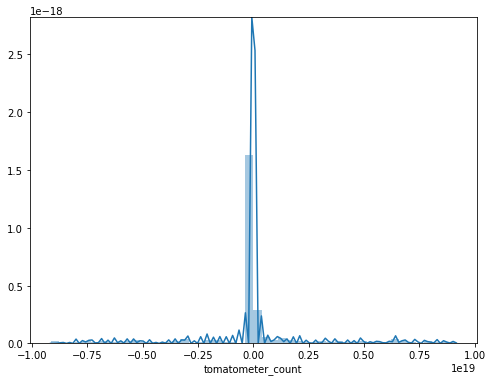

In [74]:
from scipy import stats
plt.figure(figsize=(8,6))
sns.distplot(data["tomatometer_count"]**(10))

In [75]:
data["tomatometer_count"]=data["tomatometer_count"]**(10)

# Outlier Removal

-> Percentage of data loss=  30.902192242833053


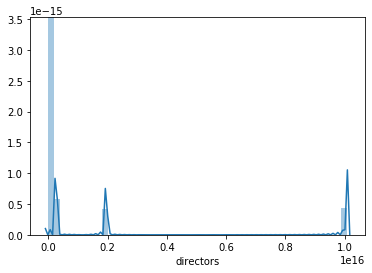

In [76]:
q1, q2, q3 = data['directors'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['directors']<Min]
data_outliers = pd.concat([data_outliers, data[data['directors']>Max]])
no_outlier_data = data[data['directors']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['directors']<Max]
print("-> Percentage of data loss= ", len(data_outliers['directors'])*100/len(data['directors']))
sns.distplot(no_outlier_data['directors'])

In [77]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


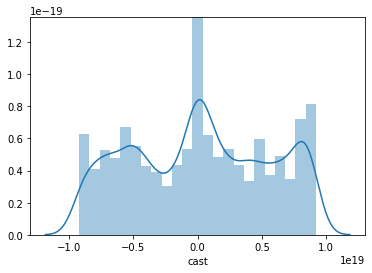

In [78]:
q1, q2, q3 = data['cast'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['cast']<Min]
data_outliers = pd.concat([data_outliers, data[data['cast']>Max]])
no_outlier_data = data[data['cast']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['cast']<Max]
print("-> Percentage of data loss= ", len(data_outliers['cast'])*100/len(data['cast']))
sns.distplot(no_outlier_data['cast'])

In [79]:
data = no_outlier_data.copy()

-> Percentage of data loss=  4.724134925477207


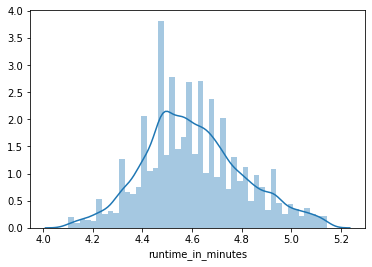

In [80]:
q1, q2, q3 = data['runtime_in_minutes'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['runtime_in_minutes']<Min]
data_outliers = pd.concat([data_outliers, data[data['runtime_in_minutes']>Max]])
no_outlier_data = data[data['runtime_in_minutes']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['runtime_in_minutes']<Max]
print("-> Percentage of data loss= ", len(data_outliers['runtime_in_minutes'])*100/len(data['runtime_in_minutes']))
sns.distplot(no_outlier_data['runtime_in_minutes'])

In [81]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.8965327966334279


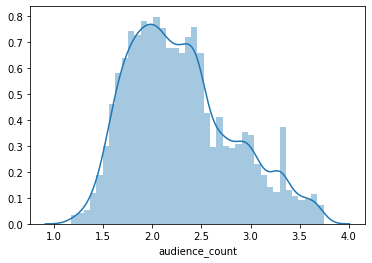

In [82]:
q1, q2, q3 = data['audience_count'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_count']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_count']>Max]])
no_outlier_data = data[data['audience_count']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_count']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_count'])*100/len(data['audience_count']))
sns.distplot(no_outlier_data['audience_count'])

In [83]:
data = no_outlier_data.copy()

-> Percentage of data loss=  34.671836056494044


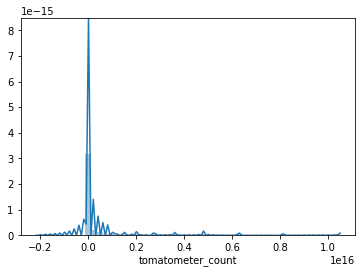

In [84]:
q1, q2, q3 = data['tomatometer_count'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['tomatometer_count']<Min]
data_outliers = pd.concat([data_outliers, data[data['tomatometer_count']>Max]])
no_outlier_data = data[data['tomatometer_count']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['tomatometer_count']<Max]
print("-> Percentage of data loss= ", len(data_outliers['tomatometer_count'])*100/len(data['tomatometer_count']))
sns.distplot(no_outlier_data['tomatometer_count'])

In [85]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


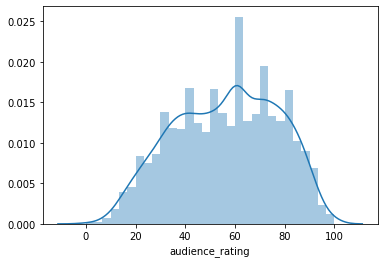

In [86]:
q1, q2, q3 = data['audience_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['audience_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['audience_rating']>Max]])
no_outlier_data = data[data['audience_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['audience_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['audience_rating'])*100/len(data['audience_rating']))
sns.distplot(no_outlier_data['audience_rating'])

In [87]:
data = no_outlier_data.copy()

-> Percentage of data loss=  0.0


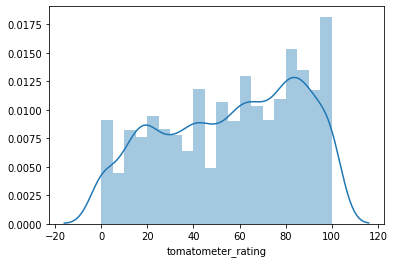

In [88]:
q1, q2, q3 = data['tomatometer_rating'].quantile([.25,.50,.75])
IQR = q3-q1
Min = q1 - IQR*1.5
Max = q3 + IQR*1.5
data_outliers = data[data['tomatometer_rating']<Min]
data_outliers = pd.concat([data_outliers, data[data['tomatometer_rating']>Max]])
no_outlier_data = data[data['tomatometer_rating']>Min]
no_outlier_data = no_outlier_data[no_outlier_data['tomatometer_rating']<Max]
print("-> Percentage of data loss= ", len(data_outliers['tomatometer_rating'])*100/len(data['tomatometer_rating']))
sns.distplot(no_outlier_data['tomatometer_rating'])

In [89]:
data = no_outlier_data.copy()

In [90]:
data.isnull().sum()

directors                  0
cast                       0
runtime_in_minutes         0
tomatometer_rating         0
tomatometer_count          0
audience_rating            0
audience_count             0
rating__G                  0
rating__NC17               0
rating__NR                 0
rating__PG                 0
rating__PG-13              0
rating__R                  0
Action& Adventure          0
Animation                  0
Anime& Manga               0
ArtHouse& International    0
Classics                   0
Comedy                     0
CultMovies                 0
Documentary                0
Drama                      0
Faith& Spirituality        0
Gay& Lesbian               0
Horror                     0
Kids& Family               0
Musical& PerformingArts    0
Mystery& Suspense          0
Romance                    0
ScienceFiction& Fantasy    0
SpecialInterest            0
Sports& Fitness            0
Television                 0
Western                    0
label         

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
mms = MinMaxScaler()

In [93]:
data[["directors","cast","runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]]=mms.fit_transform(data[["directors","cast","runtime_in_minutes","tomatometer_rating","tomatometer_count","audience_rating","audience_count"]])

In [94]:
data

,directors,cast,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,rating__G,rating__NC17,rating__NR,...,Kids& Family,Musical& PerformingArts,Mystery& Suspense,Romance,ScienceFiction& Fantasy,SpecialInterest,Sports& Fitness,Television,Western,label
8,0.000000,0.509230,0.562905,0.20,0.170095,0.87,0.465762,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.000000
10,0.193807,0.622426,0.518755,0.80,0.170140,0.66,0.616737,0,0,0,...,0,0,1,0,0,0,0,0,0,10.000000
15,0.000000,0.440654,0.798137,0.04,0.175112,0.35,0.383853,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.000000
16,0.026012,0.493139,0.396535,1.00,0.170254,0.86,0.234661,0,0,0,...,0,0,1,0,0,0,0,0,0,13.000000
18,0.000000,0.715419,0.300134,0.80,0.170094,0.82,0.332684,1,0,0,...,1,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16609,0.000000,0.955539,0.412190,0.55,0.170096,0.39,0.313070,0,1,0,...,0,0,0,0,0,0,0,0,0,26.260602
16610,0.000000,0.501927,0.458494,0.77,0.170105,0.44,0.299537,0,0,1,...,0,0,0,0,0,0,0,0,0,26.260602
16611,0.000051,0.687552,0.473714,0.76,0.177642,0.55,0.337418,0,0,1,...,1,0,0,0,0,0,0,0,0,26.260602
16616,0.000000,0.620789,0.364880,0.25,0.170905,0.61,0.369378,0,0,1,...,0,1,0,0,0,0,0,0,0,26.260602


In [95]:
data['label'].describe()

count    7077.000000
mean       23.380651
std        45.050210
min      -156.000000
25%         3.000000
50%        11.000000
75%        30.000000
max       412.000000
Name: label, dtype: float64

In [96]:
temp=data['label'].mean()
temp

23.380650928702643

In [97]:
data['label']=data['label'].apply(lambda x: 1 if x>temp else 0)

In [98]:
data[data['label']==1].count()

directors                  2226
cast                       2226
runtime_in_minutes         2226
tomatometer_rating         2226
tomatometer_count          2226
audience_rating            2226
audience_count             2226
rating__G                  2226
rating__NC17               2226
rating__NR                 2226
rating__PG                 2226
rating__PG-13              2226
rating__R                  2226
Action& Adventure          2226
Animation                  2226
Anime& Manga               2226
ArtHouse& International    2226
Classics                   2226
Comedy                     2226
CultMovies                 2226
Documentary                2226
Drama                      2226
Faith& Spirituality        2226
Gay& Lesbian               2226
Horror                     2226
Kids& Family               2226
Musical& PerformingArts    2226
Mystery& Suspense          2226
Romance                    2226
ScienceFiction& Fantasy    2226
SpecialInterest            2226
Sports& 

In [99]:
X = data.drop('label', axis = 1).values
y = data['label'].values.reshape(-1,1)

In [100]:
X.shape

(7077, 34)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22)

# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [103]:
from sklearn.metrics import accuracy_score
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.6195018547959724
Test set:  0.6334745762711864


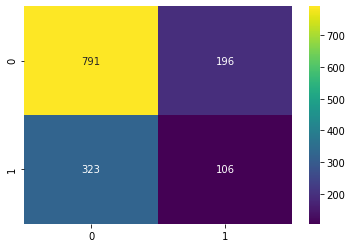

In [104]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

# Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()

In [106]:
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred_rf_train = clf.predict(X_train)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = clf.predict(X_test)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

Training set:  1.0
Test set:  0.6892655367231638


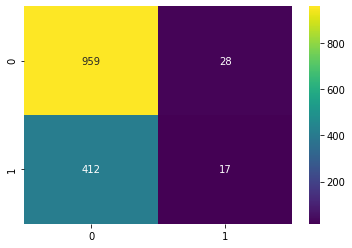

In [108]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()


# Logistic Regression

In [109]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [110]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.6825649178590355
Test set:  0.6970338983050848


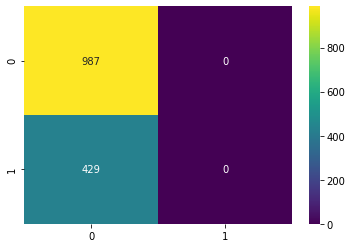

In [112]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

In [113]:
#### SVM

In [114]:
from sklearn.svm import SVC
classifier_svm = SVC()

In [115]:
classifier_svm.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
y_pred_svm_train = classifier_svm.predict(X_train)
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
print("Training set: ", accuracy_svm_train)

y_pred_svm_test = classifier_svm.predict(X_test)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print("Test set: ", accuracy_svm_test)

Training set:  0.6825649178590355
Test set:  0.6970338983050848


# ANN

In [117]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [119]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(5661, 34)
(1416, 34)


In [120]:
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [121]:
y_train_encoded = encode(y_train)

Shape of data (BEFORE encode): (5661, 1)
Shape of data (AFTER  encode): (5661, 2)



In [122]:
y_test_encoded = encode(y_test)

Shape of data (BEFORE encode): (1416, 1)
Shape of data (AFTER  encode): (1416, 2)



In [123]:
y_train_encoded = np.delete(y_train_encoded, [0,4], axis = 1)
y_test_encoded = np.delete(y_test_encoded, [0,4], axis = 1)
print(y_train_encoded[2])
print(y_test_encoded[2])

[0.]
[1.]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [127]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 9, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded), batch_size = 100, epochs = 1150)

Train on 5661 samples, validate on 1416 samples
Epoch 1/1150
5661/5661 [==============================] - 0s 42us/step - loss: 0.6791 - accuracy: 0.6822 - val_loss: 0.6555 - val_accuracy: 0.6970
Epoch 2/1150
5661/5661 [==============================] - 0s 27us/step - loss: 0.6372 - accuracy: 0.6826 - val_loss: 0.6138 - val_accuracy: 0.6970
Epoch 3/1150
5661/5661 [==============================] - 0s 33us/step - loss: 0.6210 - accuracy: 0.6826 - val_loss: 0.6129 - val_accuracy: 0.6970
Epoch 4/1150
5661/5661 [==============================] - 0s 29us/step - loss: 0.6201 - accuracy: 0.6826 - val_loss: 0.6133 - val_accuracy: 0.6970
Epoch 5/1150
5661/5661 [==============================] - 0s 35us/step - loss: 0.6194 - accuracy: 0.6826 - val_loss: 0.6133 - val_accuracy: 0.6970
Epoch 6/1150
5661/5661 [==============================] - 0s 29us/step - loss: 0.6194 - accuracy: 0.6826 - val_loss: 0.6136 - val_accuracy: 0.6970
Epoch 7/1150
5661/5661 [==============================] - 0s 25us/step

In [136]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history.get('acc')[-1]
axes[1].plot(history.history.get('val_acc')[-1]
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

SyntaxError: invalid syntax (<ipython-input-136-b28962f19933>, line 11)

In [132]:
print("Training set: ", history.history.get('acc')[-1])
print("Test set: ", history.history.get('val_acc')[-1])

TypeError: 'NoneType' object is not subscriptable

In [130]:
history